In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import numpy as np
import time
import warnings

In [2]:
import pandas as pd
# df_all = pd.read_csv("/local/CTimages/brain/code_5mm/data/tumor_slices_2mm/zzu2/03_h5data/features/['T2', 'Flair', 'CET1']/results.csv")
df_all = pd.read_csv("./results.csv")

In [3]:

df_grade


NameError: name 'df_grade' is not defined

Internal test set1
 ACC: 0.820±0.016
 AUC: 0.909±0.015
 Spe.: 0.887±0.036
 Sen.: 0.760±0.052
F1: 0.816±0.022
Internal test set2
 ACC: 0.855±0.022
 AUC: 0.881±0.015
 Spe.: 0.941±0.028
 Sen.: 0.665±0.028
F1: 0.742±0.034
External test set
 ACC: 0.860±0.018
 AUC: 0.850±0.030
 Spe.: 0.916±0.036
 Sen.: 0.560±0.091
F1: 0.557±0.027


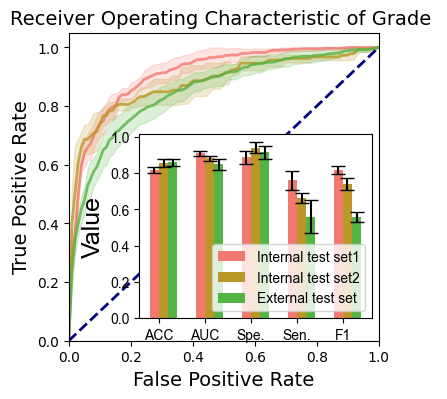

Internal test set1
 ACC: 0.851±0.012
 AUC: 0.921±0.008
 Spe.: 0.790±0.064
 Sen.: 0.901±0.036
F1: 0.869±0.007
Internal test set2
 ACC: 0.874±0.014
 AUC: 0.917±0.025
 Spe.: 0.679±0.035
 Sen.: 0.965±0.024
F1: 0.912±0.011
External test set
 ACC: 0.894±0.010
 AUC: 0.873±0.030
 Spe.: 0.531±0.050
 Sen.: 0.955±0.012
F1: 0.939±0.006


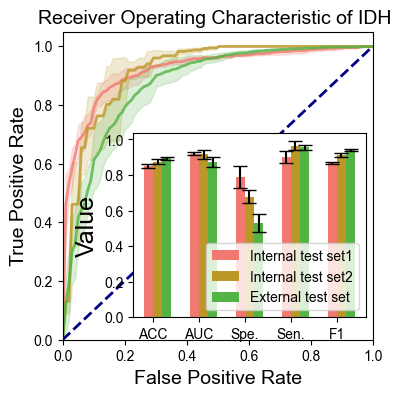

Internal test set1
 ACC: 0.798±0.040
 AUC: 0.869±0.032
 Spe.: 0.981±0.011
 Sen.: 0.438±0.107
F1: 0.587±0.105
Internal test set2
 ACC: 0.844±0.014
 AUC: 0.839±0.010
 Spe.: 0.962±0.036
 Sen.: 0.680±0.065
F1: 0.783±0.027
External test set
 ACC: 0.768±0.031
 AUC: 0.721±0.029
 Spe.: 0.931±0.039
 Sen.: 0.412±0.059
F1: 0.526±0.064


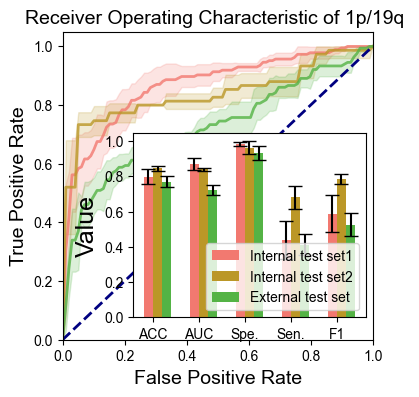

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from scipy import interp
from utils.calculate import getROC_input,calculate_metrics_df,plt_combined_roc_with_confidence_interval
# Function to plot the ROC curve with confidence intervals



# Function to plot the bar chart with standard deviation lines
def plt_bar_chart(metrics_df,ax):
    # metrics = ['Accuracy', 'AUC', 'Specificity', 'Sensitivity', 'F1-score']
    metrics = ['ACC', 'AUC', 'Spe.', 'Sen.', 'F1']
    x = np.arange(len(metrics))
    width = 0.2
    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 4))
    # fig, ax = plt.subplots(figsize=(10, 8))
    palette = ["#F27970", '#BB9727', '#54B345', '#32B897']
    
    for i, dataset in enumerate(metrics_df.index):
        means = [metrics_df.at[dataset, metric][0] for metric in metrics]
        stds = [metrics_df.at[dataset, metric][1] for metric in metrics]
        ax.bar(x + i*width, means, width, yerr=stds, label=dataset, color=palette[i % len(palette)], capsize=5)
    
    # ax.set_xlabel('Metrics')
    ax.set_ylabel('Value')
    # ax.set_title('Metrics by Dataset')
    ax.set_xticks(x + width / 2)
    ax.set_xticklabels(metrics,fontsize=10)
    ax.legend(loc='lower right')
    return ax
    # plt.show()


def plot_ROC_bar(df,genetype,datasets):
    df.columns = ["Prob","Label","dataset","Fold","ID","center"]
   
    # df["Pred"] = df.Prob.apply(lambda x: 1 if x > 0.5 else 0)
    # Plot ROC with confidence interval
    fig, main_ax = plt.subplots(figsize=(4, 4))
    ax = plt_combined_roc_with_confidence_interval(df,genetype=genetype, datasets=datasets,ax=main_ax,legend_remove = True)
    # Create inset axes for the bar chart
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    inset_ax = inset_axes(main_ax, width="50%", height="40%", loc=4,bbox_to_anchor=(-0.5, 0.05,1.5, 1.5), bbox_transform=main_ax.transAxes)  # Adjust size and position
    # Calculate metrics and plot bar chart
    metrics_df = calculate_metrics_df(df,datasets=datasets)
    plt_bar_chart(metrics_df,ax=inset_ax)
    plt.show()
    return metrics_df
datasets = ["Internal test set1","Internal test set2","External test set"]
df_grade = df_all[["logits_grade_type2","grade","dataset","Fold","ID","center"]]
metrics_df_grade = plot_ROC_bar(df_grade,genetype="Grade",datasets = datasets)
df_idh = df_all[["logits_idh_type2","IDH","dataset","Fold","ID","center"]]
metrics_df_idh = plot_ROC_bar(df_idh,genetype="IDH",datasets = datasets)
df_p119q = df_all[["logits_p119q_type2","p1_19qs","dataset","Fold","ID","center"]]
df_p119q = df_p119q[df_p119q["p1_19qs"] != 2]
metrics_df_p119q = plot_ROC_bar(df_p119q,genetype="1p/19q",datasets = datasets)



In [5]:
df_grade["center_ID"] = df_grade['center'].astype(str) + '_' + df_grade['ID'].astype(str)
df_idh["center_ID"] = df_idh['center'].astype(str) + '_' + df_idh['ID'].astype(str)
df_p119q["center_ID"] = df_p119q['center'].astype(str) + '_' + df_p119q['ID'].astype(str)
df_grade

/tmp/ipykernel_3850397/3034875114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grade["center_ID"] = df_grade['center'].astype(str) + '_' + df_grade['ID'].astype(str)
/tmp/ipykernel_3850397/3034875114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_idh["center_ID"] = df_idh['center'].astype(str) + '_' + df_idh['ID'].astype(str)


,Prob,Label,dataset,Fold,ID,center,center_ID
0,0.999964,1,Validation,fold0,1,val,val_1
1,0.006874,0,Validation,fold0,2,val,val_2
2,0.201826,0,Validation,fold0,3,val,val_3
3,0.306816,0,Validation,fold0,4,val,val_4
4,0.990271,1,Validation,fold0,5,val,val_5
...,...,...,...,...,...,...,...
7320,0.996237,1,Internal test set2,fold4,125,zzu3,zzu3_125
7321,0.975581,1,Internal test set2,fold4,127,zzu3,zzu3_127
7322,0.604219,1,Internal test set2,fold4,128,zzu3,zzu3_128
7323,0.001162,0,Internal test set2,fold4,129,zzu3,zzu3_129


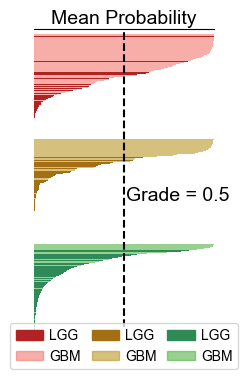

In [10]:

def plot_distribution(ax, df, labels, show_legend=False, show_xlabel=False,palette = ["#B22222", "#F2797099"]):
    plt.rcParams['font.family'] = ['Arial']
    plt.rcParams["axes.labelsize"] = 15
    

    # 对数据进行排序
    df = df.sort_values("Prob")
    df = df.reset_index(drop=True)
    
    # 使用barh绘制水平条形图
    bars = ax.barh(y=df.index*0.8, width=df["Prob"], color=[palette[label] for label in df["Label"]])
    
    # 设置X轴在顶部
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    
    # 手动创建图例
    if show_legend:
        from matplotlib.patches import Patch
        legend_handles = [Patch(color=palette[i], label=labels[i]) for i in range(len(labels))]
        ax.legend(handles=legend_handles, loc='lower right', bbox_to_anchor=(1.01, 0.27), fontsize=12)

    # 设置X轴刻度
    if show_xlabel:
        ax.set_xlabel("Mean Probability", fontsize=14)
        ax.set_xticks([0, 0.5, 1])
        ax.tick_params(axis='x', labelsize=14)
    else:
        ax.set_xticks([])
        ax.set_xlabel("")

    ax.set_xlim(0, 1)
    
    # 隐藏不需要的轴
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    if not show_xlabel:
        ax.spines['top'].set_visible(False)  # 移除顶部轴线

    ax.yaxis.set_ticks([])  # 移除Y轴刻度
    ax.yaxis.set_visible(False)  # 移除Y轴
    
# 创建图表
fig, axs = plt.subplots(3, 1, sharex=True, figsize = (2,3.5), dpi=100, facecolor="w")
mean_df_grade = df_grade.groupby('center_ID')['Prob'].mean().reset_index()
#"Internal test set1","Internal test set2","External test set"
# Merge the mean probabilities back with the original DataFrame
new_df_grade = pd.merge(df_grade[["Label","dataset","center_ID"]].drop_duplicates(), mean_df_grade, on='center_ID',how="inner", suffixes=('', '_mean'))
df_grade_val = new_df_grade[new_df_grade["dataset"]=="Internal test set1"].reset_index(drop=True)
df_grade_internal = new_df_grade[new_df_grade["dataset"]=="Internal test set2"].reset_index(drop=True)
df_grade_external = new_df_grade[new_df_grade["dataset"]=="External test set"].reset_index(drop=True)
# 绘制每个子图
plot_distribution(axs[0], df_grade_val, labels=['LGG', 'GBM'],show_legend=False,show_xlabel=True,palette = ["#B22222", "#F2797099"])
plot_distribution(axs[1], df_grade_internal, labels=['LGG', 'GBM'],show_legend=False, show_xlabel=False,palette = ['#A36F14','#BB972799'])
plot_distribution(axs[2], df_grade_external, labels=['LGG', 'GBM'],show_legend=False, show_xlabel=False,palette = ['#2E8B57','#54B34599'])
# 在所有子图之间添加贯穿的竖线
fig.align_ylabels(axs)  # 确保子图对齐
fig.subplots_adjust(hspace=0)  # 调整子图间距
line = plt.Line2D((0.5, 0.5), (0.1, 0.95), color='black', linestyle='--', transform=fig.transFigure, figure=fig)
fig.add_artist(line)
fig.text(0.51, 0.5, 'Grade = 0.5', ha='left', va='top', fontsize=14, rotation=0)
import matplotlib.patches as mpatches
legend_elements = [
    mpatches.Patch(color='#B22222', label="LGG"),
    mpatches.Patch(color="#F2797099", label="GBM"),
    mpatches.Patch(color='#A36F14', label="LGG"),
    mpatches.Patch(color='#BB972799', label="GBM"),
    mpatches.Patch(color='#2E8B57', label="LGG"),
    mpatches.Patch(color='#54B34599', label="GBM")
]
# plt.figtext(0.5, 0.01, 'Ground Truth: wt', ha='right', va='center', fontsize=12, color='black')
# plt.figtext(0.51, 0.01, 'mut', ha='left', va='center', fontsize=12, color='black')

fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.04),ncol=3,handletextpad=0.4, columnspacing=0.8)

# fig.legend(handles=legend_elements, loc='lower center', ncol=2,frameon=False)
# 移除中间两个子图的X轴标签和顶部轴线
for ax in axs[1:]:
    ax.set_xticks([])
    ax.set_xlabel("")
    ax.spines['top'].set_visible(False)  # 移除顶部轴线
plt.tight_layout(pad=0.1, h_pad=0.01, w_pad=0.1)
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

plt.show()




/tmp/ipykernel_3849441/4078823168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_idh["center_ID"] = df_idh['center'].astype(str) + '_' + df_idh['ID'].astype(str)


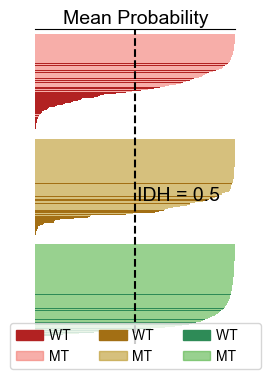

In [11]:


# 创建图表
fig, axs = plt.subplots(3, 1, sharex=True, figsize = (2,3.5), dpi=100, facecolor="w")
df_idh["center_ID"] = df_idh['center'].astype(str) + '_' + df_idh['ID'].astype(str)
mean_df_idh = df_idh.groupby('center_ID')['Prob'].mean().reset_index()
#"Internal test set1","Internal test set2","External test set"
# Merge the mean probabilities back with the original DataFrame
new_df_idh = pd.merge(df_idh[["Label","dataset","center_ID"]].drop_duplicates(), mean_df_idh, on='center_ID',how="inner", suffixes=('', '_mean'))
df_idh_val = new_df_idh[new_df_idh["dataset"]=="Internal test set1"].reset_index(drop=True)
df_idh_internal = new_df_idh[new_df_idh["dataset"]=="Internal test set2"].reset_index(drop=True)
df_idh_external = new_df_idh[new_df_idh["dataset"]=="External test set"].reset_index(drop=True)
# 绘制每个子图
plot_distribution(axs[0], df_idh_val, labels=['Wild', 'Mutation'], show_legend=False, show_xlabel=True, palette=["#B22222", "#F2797099"])
plot_distribution(axs[1], df_idh_internal, labels=['Wild', 'Mutation'], show_legend=False, show_xlabel=False, palette=['#A36F14', '#BB972799'])
plot_distribution(axs[2], df_idh_external, labels=['Wild', 'Mutation'], show_legend=False, show_xlabel=False, palette=['#2E8B57', '#54B34599'])

# 在所有子图之间添加贯穿的竖线
fig.align_ylabels(axs)  # 确保子图对齐
fig.subplots_adjust(hspace=0)  # 调整子图间距
line = plt.Line2D((0.5, 0.5), (0.05, 0.95), color='black', linestyle='--', transform=fig.transFigure, figure=fig)
fig.add_artist(line)
fig.text(0.51, 0.5, 'IDH = 0.5', ha='left', va='top', fontsize=14, rotation=0)

# 创建紧凑的图例
legend_elements = [
    mpatches.Patch(color='#B22222', label="WT   "),
    mpatches.Patch(color="#F2797099", label="MT     "),
    mpatches.Patch(color='#A36F14', label="WT   "),
    mpatches.Patch(color='#BB972799', label="MT     "),
    mpatches.Patch(color='#2E8B57', label="WT   "),
    mpatches.Patch(color='#54B34599', label="MT     ")
]

fig.legend(handles=legend_elements, loc='lower center',bbox_to_anchor=(0.5, -0.04), ncol=3, handletextpad=0.4, columnspacing=0.8)

# 移除中间两个子图的X轴标签和顶部轴线
for ax in axs[1:]:
    ax.set_xticks([])
    ax.set_xlabel("")
    ax.spines['top'].set_visible(False)  # 移除顶部轴线

# 调整布局以移除白边
plt.tight_layout(pad=0.1, h_pad=0.01, w_pad=0.1)
plt.subplots_adjust(left=0, right =1, top=0.95, bottom=0.05)

plt.show()


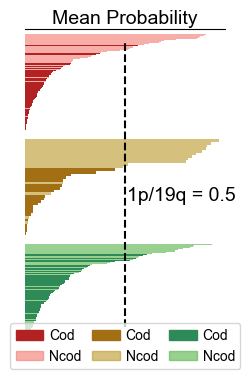

In [12]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(2,3.5), dpi=100, facecolor="w")
df_p119q["center_ID"] = df_p119q['center'].astype(str) + '_' + df_p119q['ID'].astype(str)
mean_df_p119q = df_p119q.groupby('center_ID')['Prob'].mean().reset_index()
#"Internal test set1","Internal test set2","External test set"
# Merge the mean probabilities back with the original DataFrame
new_df_p119q = pd.merge(df_p119q[["Label","dataset","center_ID"]].drop_duplicates(), mean_df_p119q, on='center_ID',how="inner", suffixes=('', '_mean'))
df_p119q_val = new_df_p119q[new_df_p119q["dataset"]=="Internal test set1"].reset_index(drop=True)
df_p119q_internal = new_df_p119q[new_df_p119q["dataset"]=="Internal test set2"].reset_index(drop=True)
df_p119q_external = new_df_p119q[new_df_p119q["dataset"]=="External test set"].reset_index(drop=True)
# 绘制每个子图
plot_distribution(axs[0], df_p119q_val, labels=['Wild', 'Mutation'], show_legend=False, show_xlabel=True, palette=["#B22222", "#F2797099"])
plot_distribution(axs[1], df_p119q_internal, labels=['Wild', 'Mutation'], show_legend=False, show_xlabel=False, palette=['#A36F14', '#BB972799'])
plot_distribution(axs[2], df_p119q_external, labels=['Wild', 'Mutation'], show_legend=False, show_xlabel=False, palette=['#2E8B57', '#54B34599'])

# 在所有子图之间添加贯穿的竖线
fig.align_ylabels(axs)  # 确保子图对齐
fig.subplots_adjust(hspace=0)  # 调整子图间距
line = plt.Line2D((0.5, 0.5), (0.1, 0.92), color='black', linestyle='--', transform=fig.transFigure, figure=fig)
fig.add_artist(line)
fig.text(0.51, 0.5, '1p/19q = 0.5', ha='left', va='top', fontsize=14, rotation=0)

# 创建紧凑的图例
legend_elements = [
    mpatches.Patch(color='#B22222', label="Cod"),
    mpatches.Patch(color="#F2797099", label="Ncod"),
    mpatches.Patch(color='#A36F14', label="Cod"),
    mpatches.Patch(color='#BB972799', label="Ncod"),
    mpatches.Patch(color='#2E8B57', label="Cod"),
    mpatches.Patch(color='#54B34599', label="Ncod")
]

fig.legend(handles=legend_elements, loc='lower center',bbox_to_anchor=(0.5, -0.04), ncol=3, handletextpad=0.4, columnspacing=0.8)

# 移除中间两个子图的X轴标签和顶部轴线
for ax in axs[1:]:
    ax.set_xticks([])
    ax.set_xlabel("")
    ax.spines['top'].set_visible(False)  # 移除顶部轴线

# 调整布局以移除白边
plt.tight_layout(pad=0.1, h_pad=0.01, w_pad=0.1)
plt.subplots_adjust(left=0, right =1, top=0.95, bottom=0.05)

plt.show()


In [13]:
df_idh["center_ID"] = df_idh['center'].astype(str) + '_' + df_idh['ID'].astype(str)
df_idh.columns = ["Prob_idh","Label_idh","dataset","Fold","ID","center","center_ID"]
# df_idh["Pred_idh"] = df_idh.Prob_idh.apply(lambda x: 1 if x > 0.5 else 0)
df_idh["Pred_idh"] = df_idh.Prob_idh.apply(lambda x: 1 if x > 0.901664 else 0)
df_idh["center_ID"] = df_idh['center'].astype(str) + '_' + df_idh['ID'].astype(str)
df_grade["center_ID"] = df_grade['center'].astype(str) + '_' + df_grade['ID'].astype(str)
df_grade.columns = ["Prob_grade","Label_grade","dataset","Fold","ID","center","center_ID"]
# df_grade["Pred_grade"] = df_grade.Prob_grade.apply(lambda x: 1 if x > 0.5 else 0)
df_grade["Pred_grade"] = df_grade.Prob_grade.apply(lambda x: 1 if x > 0.08045756 else 0)
df_grade["center_ID"] = df_grade['center'].astype(str) + '_' + df_grade['ID'].astype(str)


df_p119q["center_ID"] = df_p119q['center'].astype(str) + '_' + df_p119q['ID'].astype(str)
df_p119q = df_all[["logits_p119q_type2","p1_19qs","dataset","Fold","ID","center"]]
df_p119q["center_ID"] = df_p119q['center'].astype(str) + '_' + df_p119q['ID'].astype(str)
df_p119q.columns = ["Prob_p119q","Label_p119q","dataset","Fold","ID","center","center_ID"]
# df_p119q["Pred_p119q"] = df_p119q.Prob_p119q.apply(lambda x: 1 if x > 0.5 else 0)
df_p119q["Pred_p119q"] = np.where(df_p119q['Prob_p119q'].isna(), np.nan, np.where(df_p119q['Prob_p119q'] > 0.18547013, 1, 0))

/tmp/ipykernel_3849441/4181306415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_idh["center_ID"] = df_idh['center'].astype(str) + '_' + df_idh['ID'].astype(str)
/tmp/ipykernel_3849441/4181306415.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_idh["Pred_idh"] = df_idh.Prob_idh.apply(lambda x: 1 if x > 0.901664 else 0)
/tmp/ipykernel_3849441/4181306415.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

[[ 95  29]
 [  9 130]]
[[ 92  32]
 [ 12 127]]
[[ 85  39]
 [  9 130]]
[[ 96  28]
 [ 21 118]]
[[ 90  34]
 [ 20 119]]
[[66 16]
 [ 7 30]]
[[70 12]
 [ 9 28]]
[[68 14]
 [ 7 30]]
[[72 10]
 [ 8 29]]
[[67 15]
 [ 8 29]]
[[531 272]
 [ 24 127]]
[[586 217]
 [ 33 118]]
[[681 122]
 [ 37 114]]
[[715  88]
 [ 46 105]]
[[614 189]
 [ 44 107]]


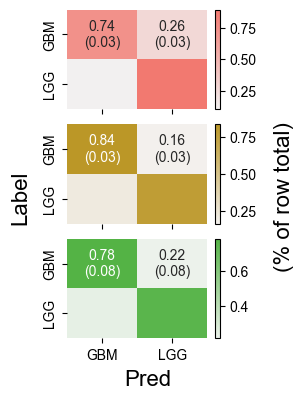

[[111   8]
 [ 45  99]]
[[107  12]
 [ 24 120]]
[[106  13]
 [ 28 116]]
[[106  13]
 [ 32 112]]
[[114   5]
 [ 46  98]]
[[31  7]
 [ 8 73]]
[[33  5]
 [13 68]]
[[32  6]
 [ 8 73]]
[[32  6]
 [ 9 72]]
[[30  8]
 [ 9 72]]
[[107  32]
 [120 695]]
[[103  36]
 [ 85 730]]
[[ 99  40]
 [ 64 751]]
[[104  35]
 [113 702]]
[[ 97  42]
 [158 657]]


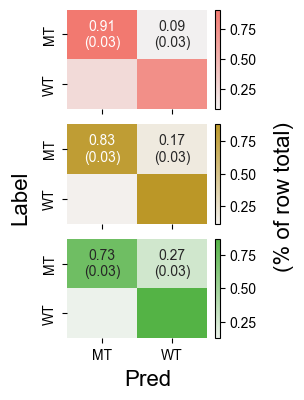

[[66  7]
 [13 24]]
[[62 11]
 [ 4 33]]
[[65  8]
 [11 26]]
[[68  5]
 [16 21]]
[[59 14]
 [12 25]]
[[18  3]
 [ 3 12]]
[[17  4]
 [ 3 12]]
[[16  5]
 [ 3 12]]
[[20  1]
 [ 5 10]]
[[15  6]
 [ 3 12]]
[[62 10]
 [17 16]]
[[59 13]
 [11 22]]
[[45 27]
 [13 20]]
[[58 14]
 [14 19]]
[[41 31]
 [11 22]]


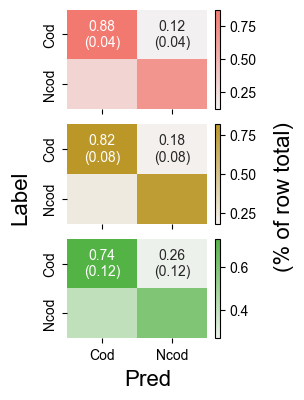

In [14]:
import seaborn as sns
palette=["#F27970", '#BB9727', '#54B345', '#32B897',"#05B9E2","#8983BF","#C76DA2","#5F97D2","#9DC3E7"]

# 创建共享坐标轴的子图
# 创建共享坐标轴的子图

# for genetype  in genetypes:
#     if genetype == "Grade":
#         df = df_grade
#     elif genetype == "IDH":
#         df = df_idh
#     elif genetype == "1p 19q":
#         df = df_p119q
def plot_CM(datasets,df,genetype):
    
    fig, axes = plt.subplots(3, 1, figsize=(3, 4.5), sharex=True, sharey=True)
    from sklearn.metrics import confusion_matrix
    # cmap = sns.diverging_palette(120, 20, as_cmap=True)
    cmaps = [
        sns.light_palette("#F27970", as_cmap=True),  # 红色主色调
        sns.light_palette("#BB9727", as_cmap=True),  # 黄色主色调
        sns.light_palette("#54B345", as_cmap=True)   # 绿色主色调
    ]
    for j, dataset in enumerate(datasets):
        subset = df[df['dataset'] == dataset]
        folds = subset['Fold'].unique()

        # 初始化混淆矩阵列表
        conf_matrices = []

        # 计算每个折的混淆矩阵
        for fold in folds:
            fold_data = subset[subset['Fold'] == fold]
            fold_data = fold_data.dropna()
            # fold_data = fold_data.iloc[:,[1,7]]
            cm = confusion_matrix(fold_data.iloc[:,1], fold_data.iloc[:,7])
            print(cm)
            cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # 计算占比
            conf_matrices.append(cm_normalized)

        # 将混淆矩阵转换为numpy数组
        conf_matrices = np.array(conf_matrices)
        
        # 计算混淆矩阵的均值和标准差
        mean_cm = np.mean(conf_matrices, axis=0)
        std_cm = np.std(conf_matrices, axis=0)

        # 创建显示值
        annot = np.empty_like(mean_cm, dtype=object)
        for m in range(mean_cm.shape[0]):
            for n in range(mean_cm.shape[1]):
                annot[m, n] = f'{mean_cm[m, n]:.2f}\n({std_cm[m, n]:.2f})'
        # print(mean_cm)
        # 绘制混淆矩阵
        im = sns.heatmap(mean_cm, annot=annot, fmt='', cmap=cmaps[j], cbar=False, ax=axes[j])
        axes[j].set_xlabel('')
        axes[j].set_ylabel('')
        # 添加独立的 colorbar
        cbar = fig.colorbar(im.collections[0], ax=axes[j], orientation='vertical', fraction=0.05, pad=0.05)
        # cbar.ax.set_ylabel(f'{dataset}', rotation=270, labelpad=15)
        # 设置刻度标签为空
        if genetype == "Grade":
            axes[j].set_xticklabels(["GBM",'LGG'])
            axes[j].set_yticklabels(["GBM",'LGG'])
        elif genetype == "IDH":
            axes[j].set_xticklabels(["MT",'WT'])
            axes[j].set_yticklabels(["MT",'WT'])
        elif genetype == "1p 19q":
            axes[j].set_xticklabels(["Cod",'Ncod'])
            axes[j].set_yticklabels(["Cod",'Ncod'])

    # 添加共享的X和Y轴标签
    fig.text(0.5, 0.08, 'Pred', ha='center', fontsize=16)
    fig.text(0.04, 0.5, 'Label', va='center', rotation='vertical', fontsize=16)

    # 调整布局以防止重叠
    plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.95])
    # cbar_ax = fig.add_axes([0.91, 0.15, 0.02, 0.7])
    # fig.colorbar(axes[-1].collections[0], cax=cbar_ax, label='(% of row total)')
    # 添加右侧说明文字
    fig.text(0.92, 0.5, '(% of row total)', va='center', rotation='vertical', fontsize=16)
    plt.show()
datasets = ["Internal test set1","Internal test set2","External test set"]
genetypes = ["Grade","IDH","1p 19q"]
plot_CM(datasets,df_grade,"Grade")
plot_CM(datasets,df_idh,"IDH")
plot_CM(datasets,df_p119q,"1p 19q")

LeveneResult(statistic=0.15848083460321477, pvalue=0.7009717108277376)
T2
Resnet34 vs MMDLM: p-value = 3.7e-03
3.74e-03**
LeveneResult(statistic=0.6071746219982154, pvalue=0.4582817569791987)
Flair
Resnet34 vs MMDLM: p-value = 8.7e-05
8.72e-05****
LeveneResult(statistic=0.023725671918441712, pvalue=0.8813997827303783)
CET1
Resnet34 vs MMDLM: p-value = 1.2e-03
1.19e-03**
LeveneResult(statistic=0.054909437559581734, pvalue=0.8206164041205661)
T2
SMDLM vs MMDLM: p-value = 4.8e-02
4.76e-02*
LeveneResult(statistic=0.0051238257899239225, pvalue=0.9446925988272334)
Flair
SMDLM vs MMDLM: p-value = 1.1e-02
1.05e-02*
LeveneResult(statistic=0.046605293440736786, pvalue=0.8344819335737422)
CET1
SMDLM vs MMDLM: p-value = 8.4e-01
LeveneResult(statistic=1.9715639810426477, pvalue=0.19789273702821075)
T2_Flair
DMDLM vs MMDLM: p-value = 1.3e-02
1.32e-02*
LeveneResult(statistic=0.09558644233113915, pvalue=0.7650906072228898)
T2_CET1
DMDLM vs MMDLM: p-value = 1.0e-01
LeveneResult(statistic=0.304193615689

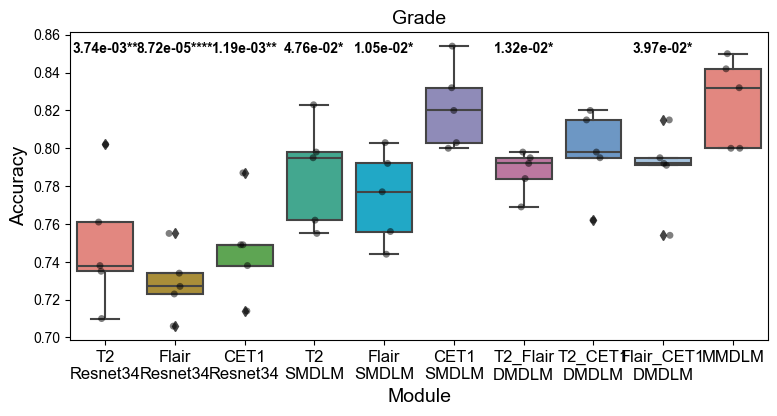

LeveneResult(statistic=0.13339487652896573, pvalue=0.724405330297933)
T2
Resnet34 vs MMDLM: p-value = 3.8e-04
3.80e-04***
LeveneResult(statistic=1.5657492354740061, pvalue=0.2461760734665538)
Flair
Resnet34 vs MMDLM: p-value = 1.4e-05
1.36e-05****
LeveneResult(statistic=0.0003765060240963868, pvalue=0.9849942269027936)
CET1
Resnet34 vs MMDLM: p-value = 5.6e-05
5.58e-05****
LeveneResult(statistic=0.6561710975790812, pvalue=0.4413422264426915)
T2
SMDLM vs MMDLM: p-value = 3.3e-02
3.31e-02*
LeveneResult(statistic=0.2761265580057559, pvalue=0.6135004023353297)
Flair
SMDLM vs MMDLM: p-value = 5.8e-04
5.81e-04***
LeveneResult(statistic=1.0866405813303455, pvalue=0.32769121300265813)
CET1
SMDLM vs MMDLM: p-value = 3.1e-02
3.06e-02*
LeveneResult(statistic=0.7326551904016654, pvalue=0.41692269158986195)
T2_Flair
DMDLM vs MMDLM: p-value = 1.1e-01
LeveneResult(statistic=0.9966519351814586, pvalue=0.34735682992579575)
T2_CET1
DMDLM vs MMDLM: p-value = 3.3e-02
3.27e-02*
LeveneResult(statistic=0.157

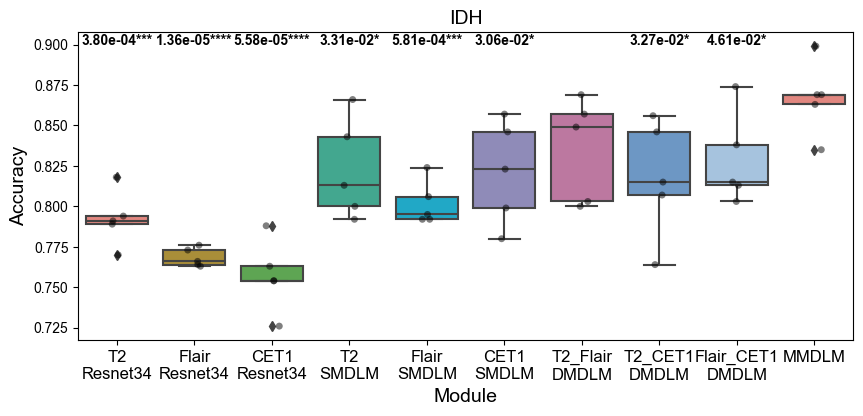

LeveneResult(statistic=0.29384756657483835, pvalue=0.6025329438566862)
T2
Resnet34 vs MMDLM: p-value = 1.3e-02
1.32e-02*
LeveneResult(statistic=1.1726384364820848, pvalue=0.3104156894261141)
Flair
Resnet34 vs MMDLM: p-value = 1.8e-03
1.79e-03**
LeveneResult(statistic=0.14729221773632156, pvalue=0.7111353740675428)
CET1
Resnet34 vs MMDLM: p-value = 1.5e-01
LeveneResult(statistic=0.06672053561122114, pvalue=0.802694027027512)
T2
SMDLM vs MMDLM: p-value = 2.7e-01
LeveneResult(statistic=0.0, pvalue=1.0)
Flair
SMDLM vs MMDLM: p-value = 2.0e-02
1.99e-02*
LeveneResult(statistic=0.0686106346483699, pvalue=0.7999886717509149)
CET1
SMDLM vs MMDLM: p-value = 3.3e-02
3.28e-02*
LeveneResult(statistic=0.42363304711482974, pvalue=0.5333740349914875)
T2_Flair
DMDLM vs MMDLM: p-value = 3.2e-01
LeveneResult(statistic=0.2470265324794152, pvalue=0.6325459930463706)
T2_CET1
DMDLM vs MMDLM: p-value = 4.4e-01
LeveneResult(statistic=0.057459403682181324, pvalue=0.8165850462791879)
Flair_CET1
DMDLM vs MMDLM: p

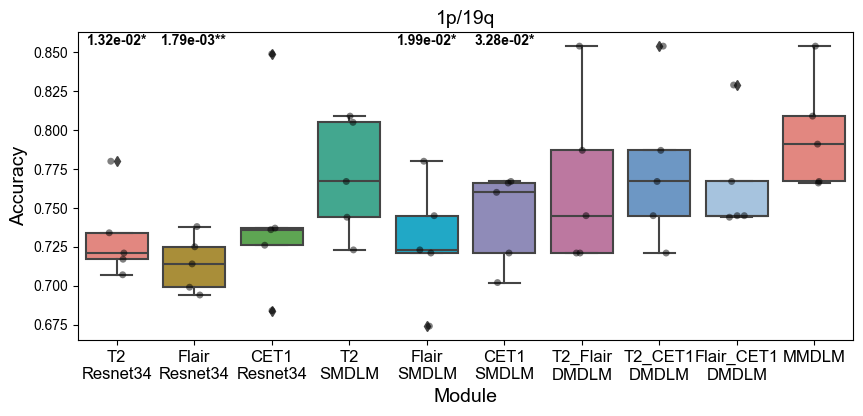

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data_grade = pd.DataFrame({
    'T2\nResnet34': [0.71,0.738,0.802,0.761,0.735],
    'Flair\nResnet34': [0.727,0.706,0.734,0.723,0.755],
    'CET1\nResnet34': [0.738,0.749,0.787,0.714,0.749],
    'T2\nSMDLM': [0.755,0.798,0.823,0.795,0.762],
    'Flair\nSMDLM': [0.744,0.756,0.777,0.803,0.792],
    'CET1\nSMDLM': [0.82,0.832,0.854,0.803, 0.8],
    'T2_Flair\nDMDLM': [0.784,0.798,0.769,0.795,0.792],
    'T2_CET1\nDMDLM': [0.82,0.798,0.815,0.795,0.762],
    'Flair_CET1\nDMDLM': [0.791,0.815,0.754,0.795,0.792],
    'MMDLM': [0.842,0.832,0.8,0.85,0.8]   
})


data_idh = pd.DataFrame({
    'T2\nResnet34': [0.791,0.789,0.818,0.794,0.770],
    'Flair\nResnet34': [0.764,0.766,0.776,0.763,0.773],
    'CET1\nResnet34': [0.754,0.754,0.788,0.726,0.763],
    'T2\nSMDLM': [0.813,0.866,0.8,0.843,0.792],
    'Flair\nSMDLM': [0.806,0.824,0.792,0.795,0.792],
    'CET1\nSMDLM': [0.799,0.857,0.846,0.78,0.823],
    'T2_Flair\nDMDLM': [0.849,0.857,0.869,0.803,0.8],
    'T2_CET1\nDMDLM': [0.856,0.807,0.846,0.764,0.815],
    'Flair_CET1\nDMDLM': [0.813,0.874,0.838,0.803,0.815],
    'MMDLM': [0.863,0.899,0.869,0.835,0.869]
})

data_1p_19q = pd.DataFrame({
    'T2\nResnet34': [0.707,0.78,0.717,0.721,0.734],
    'Flair\nResnet34': [0.699,0.738,0.694,0.714,0.725],
    'CET1\nResnet34': [0.726,0.849,0.684,0.736,0.737],
    'T2\nSMDLM': [0.723,0.805,0.809,0.744,0.767],
    'Flair\nSMDLM': [0.745,0.78,0.723,0.674,0.721],
    'CET1\nSMDLM': [0.766,0.76,0.702,0.721,0.767],
    'T2_Flair\nDMDLM': [0.745,0.854,0.787,0.721,0.721],
    'T2_CET1\nDMDLM': [0.745,0.854,0.787,0.721,0.767],
    'Flair_CET1\nDMDLM': [0.745,0.829,0.745,0.744,0.767],
    'MMDLM': [0.766,0.854,0.809,0.767,0.791]
})


from scipy.stats import ttest_ind,levene
def add_stat_annotation(ax, data, x, y, box_pairs,control_group, fontsize=12, fontweight='bold'):
    for pair in box_pairs:
        group1 = data[data[x] == pair[0]][y]
        group2 = data[data[x] == pair[1]][y]
        print(levene(group1, group2))
        stat, p = ttest_ind(group1, group2)
        print(f'{pair[0]} vs {pair[1]}: p-value = {p:.1e}')
        if p < 0.05:
            text = f'{p:.2e}*' if p < 0.05 else ''
            text += '*' if p < 0.01 else ''
            text += '*' if p < 0.001 else ''
            text += '*' if p < 0.0001 else ''
            max_y = max(max(group1), max(group2))
            y_pos = max_y - 0.001
            x1 = data[x].unique().tolist().index(pair[0])
            x2 = data[x].unique().tolist().index(pair[1])
            x_center = (x1 + x2) / 2
  
            print(text)
            ax.text(x1, y_pos, text, ha='center', va='bottom', color='black', fontsize=fontsize, fontweight=fontweight)


# Melt the dataframes for easier plotting
data_grade_melted = data_grade.melt(var_name='Module', value_name='Accuracy')
data_IDH_melted = data_idh.melt(var_name='Module', value_name='Accuracy')
data_p119q_melted = data_1p_19q.melt(var_name='Module', value_name='Accuracy')
palette = ["#F27970", '#BB9727', '#54B345', '#32B897', "#05B9E2", "#8983BF", "#C76DA2", "#5F97D2", "#9DC3E7"]
plt.figure(figsize=(9,4))


ax1 = sns.boxplot(x='Module', y='Accuracy', data=data_grade_melted, palette=palette)
sns.stripplot(x='Module', y='Accuracy', data=data_grade_melted, color='black', jitter=True, dodge=True, alpha=0.5)
plt.title("Grade",fontsize=14)

box_pairs = [
    ('T2\nResnet34', 'MMDLM'),
    ('Flair\nResnet34', 'MMDLM'),
    ('CET1\nResnet34', 'MMDLM'),
    ('T2\nSMDLM', 'MMDLM'),
    ('Flair\nSMDLM', 'MMDLM'),
    ('CET1\nSMDLM', 'MMDLM'),
    ('T2_Flair\nDMDLM', 'MMDLM'),
    ('T2_CET1\nDMDLM', 'MMDLM'),
    ('Flair_CET1\nDMDLM', 'MMDLM'),
 
]
add_stat_annotation(ax1, data_grade_melted, 'Module', 'Accuracy', box_pairs,control_group='MMDLM',fontsize=10, fontweight='bold')
plt.xticks(fontsize=12,rotation=0)#, ha='right'
# plt.tight_layout()
plt.xlabel("Module", fontsize=14)  # 增大 x 轴标签字体
plt.ylabel("Accuracy", fontsize=14)  # 增大 y 轴标签字体
# plt.savefig("Fig.svg")  # 或 .svg
plt.show()
plt.figure(figsize=(10,4))

ax2 = sns.boxplot(x='Module', y='Accuracy', data=data_IDH_melted, palette=palette)
sns.stripplot(x='Module', y='Accuracy', data=data_IDH_melted, color='black', jitter=True, dodge=True, alpha=0.5)
plt.title('IDH',fontsize=14)

add_stat_annotation(ax2, data_IDH_melted, 'Module', 'Accuracy', box_pairs,control_group='MMDLM',fontsize=10, fontweight='bold')
plt.xticks(fontsize=12)
# plt.tight_layout()
plt.xlabel("Module", fontsize=14)  # 增大 x 轴标签字体
plt.ylabel("Accuracy", fontsize=14)  # 增大 y 轴标签字体
plt.show()
plt.figure(figsize=(10,4))

ax3 = sns.boxplot(x='Module', y='Accuracy', data=data_p119q_melted, palette=palette)
sns.stripplot(x='Module', y='Accuracy', data=data_p119q_melted, color='black', jitter=True, dodge=True, alpha=0.5)
plt.title('1p/19q',fontsize=14)

add_stat_annotation(ax3, data_p119q_melted, 'Module', 'Accuracy', box_pairs,control_group='MMDLM',fontsize=10, fontweight='bold')
plt.xticks(fontsize=12)
plt.xlabel("Module", fontsize=14)  # 增大 x 轴标签字体
plt.ylabel("Accuracy", fontsize=14)  # 增大 y 轴标签字体
# plt.tight_layout()
plt.show()

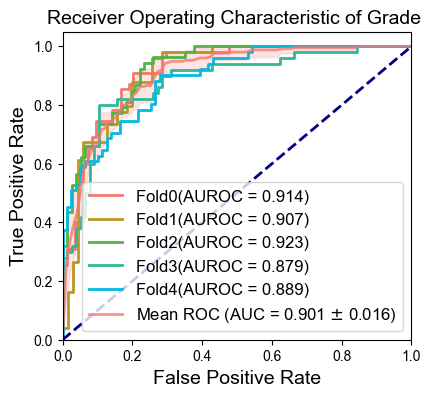

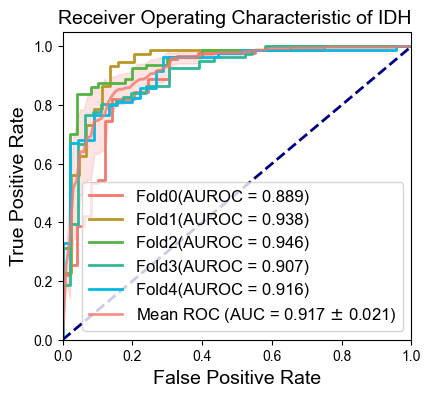

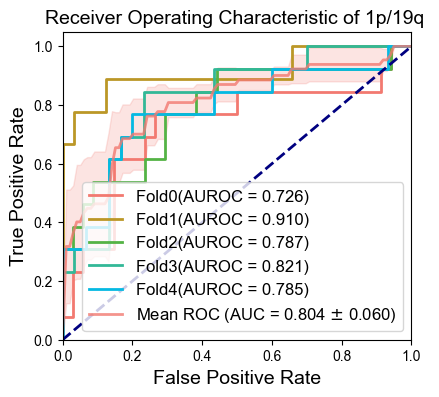

In [5]:



# Function to calculate different metrics
def calculate_metrics(df,genetype, datasets='dataset', label_col='Label', prob_col='Prob'):
    metrics = {'Accuracy': [], 'AUC': [], 'Specificity': [], 'Sensitivity': [], 'F1-score': []}
    # datasets = df[dataset_col].unique()
    for dataset in datasets:
        accuracies = []
        aucs = []
        specificities = []
        sensitivities = []
        f1_scores = []
        for fold in df['Fold'].unique():
            fold_data = df[(df['dataset'] == dataset) & (df['Fold'] == fold)]
            if fold_data.shape[0] == 0:
                continue
            label = fold_data[label_col]
            if genetype == "1p/19q":
                prob = fold_data[prob_col] > 0.18
            else:
                prob = fold_data[prob_col] > 0.5
            accuracies.append(accuracy_score(label, prob))
            aucs.append(roc_auc_score(label, fold_data[prob_col]))
            specificities.append(recall_score(label, prob, pos_label=0))
            sensitivities.append(recall_score(label, prob, pos_label=1))
            f1_scores.append(f1_score(label, prob))
        
        metrics['Accuracy'].append((np.mean(accuracies), np.std(accuracies)))
        metrics['AUC'].append((np.mean(aucs), np.std(aucs)))
        metrics['Specificity'].append((np.mean(specificities), np.std(specificities)))
        metrics['Sensitivity'].append((np.mean(sensitivities), np.std(sensitivities)))
        metrics['F1-score'].append((np.mean(f1_scores), np.std(f1_scores)))
    
    metrics_df = pd.DataFrame(metrics, index=datasets)
    return metrics_df

# Function to plot the bar chart with standard deviation lines
def plt_bar_chart(metrics_df,ax):
    metrics = ['Accuracy', 'AUC', 'Specificity', 'Sensitivity', 'F1-score']
    x = np.arange(len(metrics))
    width = 0.2
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    # fig, ax = plt.subplots(figsize=(10, 8))
    palette = ["#F27970", '#BB9727', '#54B345', '#32B897']
    
    for i, dataset in enumerate(metrics_df.index):
        means = [metrics_df.at[dataset, metric][0] for metric in metrics]
        stds = [metrics_df.at[dataset, metric][1] for metric in metrics]
        ax.bar(x + i*width, means, width, yerr=stds, label=dataset, color=palette[i % len(palette)], capsize=5)
    
    # ax.set_xlabel('Metrics')
    ax.set_ylabel('Value')
    # ax.set_title('Metrics by Dataset')
    ax.set_xticks(x + width / 2)
    ax.set_xticklabels(metrics,fontsize=10)
    ax.legend(loc='lower right')
    return ax
    # plt.show()


def plot_ROC_bar(df,genetype,datasets):
    df.columns = ["Prob","Label","dataset","Fold","ID","center"]
   
    # df["Pred"] = df.Prob.apply(lambda x: 1 if x > 0.5 else 0)
    # Plot ROC with confidence interval
    fig, main_ax = plt.subplots(figsize=(4.5, 4))
    ax = plt_combined_roc_with_confidence_interval(df,genetype=genetype, datasets=datasets,ax=main_ax,plot_eachfold= True,legend_remove = False)
    # Create inset axes for the bar chart
    # from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    # inset_ax = inset_axes(main_ax, width="50%", height="40%", loc=4,bbox_to_anchor=(-0.5, 0.05,1.5, 1.5), bbox_transform=main_ax.transAxes)  # Adjust size and position
    # Calculate metrics and plot bar chart
    metrics_df = calculate_metrics(df,genetype=genetype,datasets=datasets)
    # plt_bar_chart(metrics_df,ax=inset_ax)
    plt.show()
    return metrics_df
datasets = ["Validation"]
df_grade = df_all[["logits_grade_type2","grade","dataset","Fold","ID","center"]]
metrics_df_grade = plot_ROC_bar(df_grade,genetype="Grade",datasets = datasets)
df_idh = df_all[["logits_idh_type2","IDH","dataset","Fold","ID","center"]]
metrics_df_idh = plot_ROC_bar(df_idh,genetype="IDH",datasets = datasets)
df_p119q = df_all[["logits_p119q_type2","p1_19qs","dataset","Fold","ID","center"]]
df_p119q = df_p119q[df_p119q["p1_19qs"] != 2]
metrics_df_p119q = plot_ROC_bar(df_p119q,genetype="1p/19q",datasets = datasets)

/tmp/ipykernel_3853565/1324080055.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_grade["Group"]= pred_grade.Group.apply(lambda x: "LGG" if x == "1_b" else "GBM")


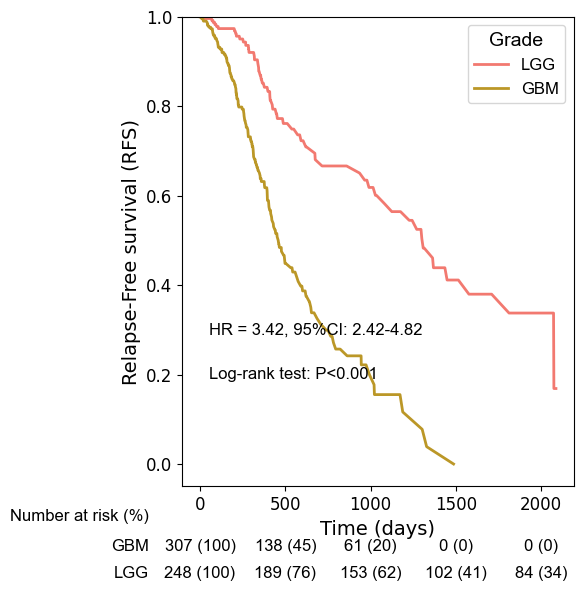

/tmp/ipykernel_3853565/1324080055.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_IDH["Group"]= pred_IDH.IDH.apply(lambda x: "Mutation" if x == 0 else "Wild")


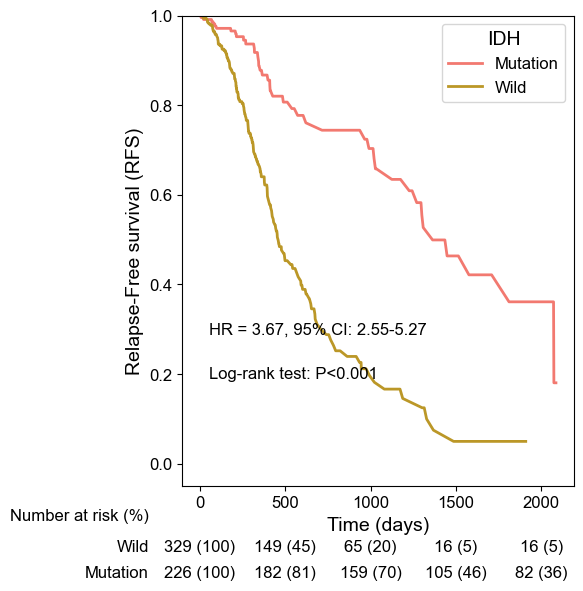

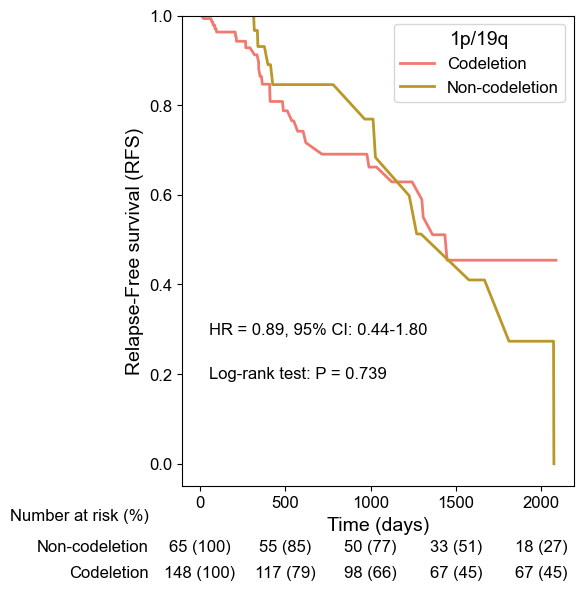

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from lifelines import KaplanMeierFitter,CoxPHFitter
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test,multivariate_logrank_test
import seaborn as sns
from lifelines.plotting import add_at_risk_counts
from utils.calculate import plot_KM
pred = pd.read_csv("all_os.csv")

pred_grade = pred[["Time","Event","grade"]]
pred_grade.columns = ["Time","Event","Group"]
pred_grade["Group"]= pred_grade.Group.apply(lambda x: "LGG" if x == "1_b" else "GBM")
plot_KM(pred_grade,"Grade",50,HR = "HR = 3.42, 95%CI: 2.42-4.82")
# plot_KM_custom_risktable(pred_grade, title="Grade", y=200, HR="HR = 3.42, 95%CI: 2.42-4.82")

pred_IDH = pred[["Time","Event","IDH"]]
pred_IDH["Group"]= pred_IDH.IDH.apply(lambda x: "Mutation" if x == 0 else "Wild")
plot_KM(pred_IDH,"IDH",50,HR = "HR = 3.67, 95% CI: 2.55-5.27")

pred_p119q = pred[["Time","Event","p1_19qs"]]
pred_p119q = pred_p119q[pred_p119q["p1_19qs"] != 2]

pred_p119q["Group"]= pred_p119q.p1_19qs.apply(lambda x: "Codeletion" if x == 0 else "Non-codeletion")
plot_KM(pred_p119q,"1p/19q",50,HR = "HR = 0.89, 95% CI: 0.44-1.80")

/tmp/ipykernel_3853565/305438501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_grade["Group"]= pred_grade.logits_grade_cat.apply(lambda x: "Low" if x == "High" else "High")


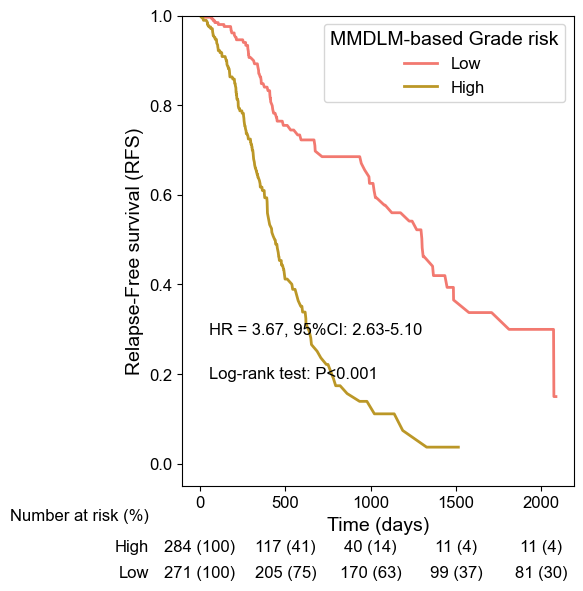

/tmp/ipykernel_3853565/305438501.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_IDH["Group"]= pred_IDH.logits_idh_cat.apply(lambda x: "High" if x == "2_High" else "Low")


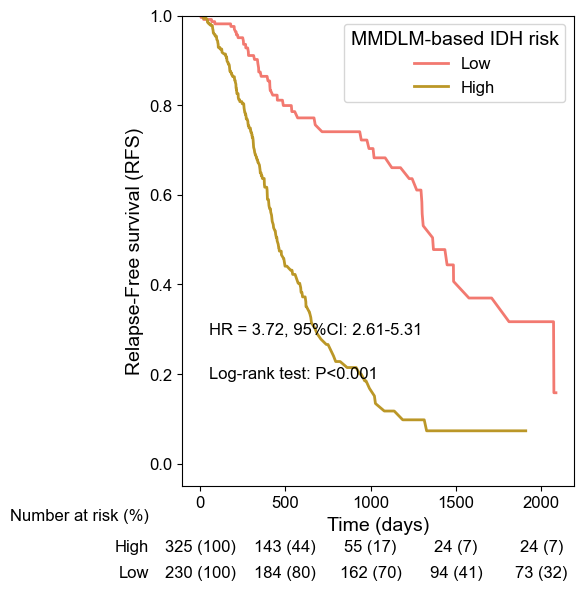

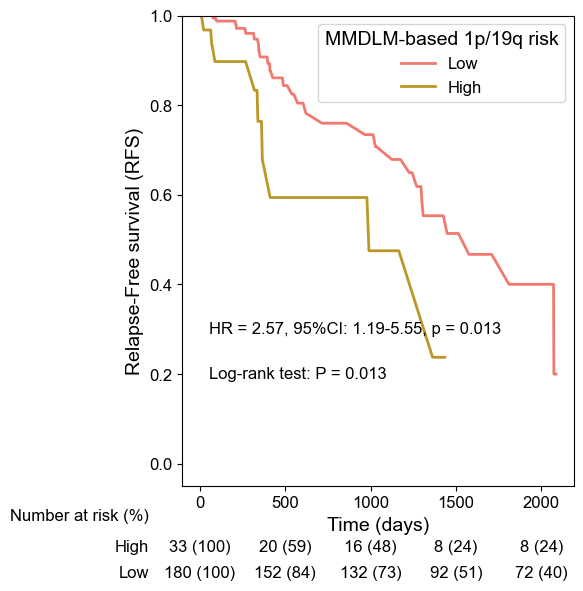

In [2]:
pred_grade = pred[["Time","Event","logits_grade_cat"]]
pred_grade["Group"]= pred_grade.logits_grade_cat.apply(lambda x: "Low" if x == "High" else "High")
plot_KM(pred_grade,"MMDLM-based Grade risk",50,HR = "HR = 3.67, 95%CI: 2.63-5.10")

pred_IDH = pred[["Time","Event","logits_idh_cat"]]
pred_IDH["Group"]= pred_IDH.logits_idh_cat.apply(lambda x: "High" if x == "2_High" else "Low")
plot_KM(pred_IDH,"MMDLM-based IDH risk",50,HR = "HR = 3.72, 95%CI: 2.61-5.31")

pred_p119q = pred[["Time","Event","logits_p119q_cat"]]
pred_p119q = pred_p119q[pred_p119q["logits_p119q_cat"].notna()]

pred_p119q["Group"]= pred_p119q.logits_p119q_cat.apply(lambda x: "Low" if x == "2_High" else "High")
plot_KM(pred_p119q,"MMDLM-based 1p/19q risk",50,HR = "HR = 2.57, 95%CI: 1.19-5.55, p = 0.013")

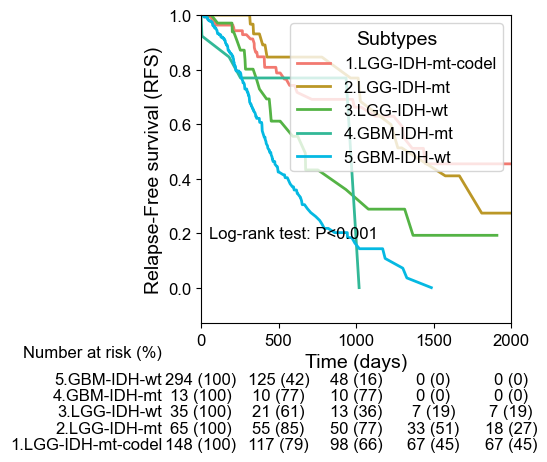

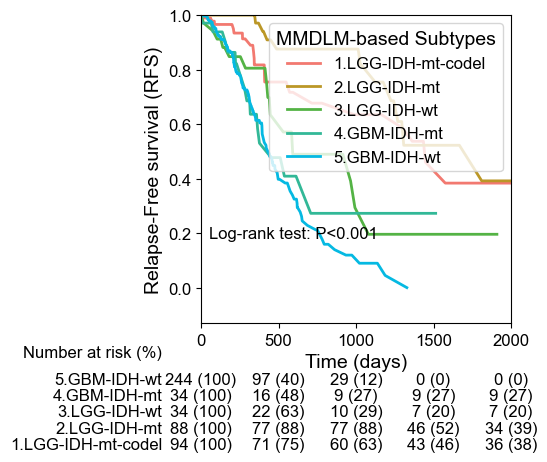

In [3]:
import seaborn as sns

def plot_KM(df, title, y, HR=None):
    fig, axes = plt.subplots(figsize=(4, 4), nrows=1, ncols=1) 
    lw = 2  
    palette = ["#F27970", '#BB9727', '#54B345', '#32B897',
               "#05B9E2", "#8983BF", "#C76DA2", "#5F97D2", "#9DC3E7"]
    
    plt.rcParams['font.family'] = ['Arial']
    plt.rcParams["axes.labelsize"] = 18

    groups = df["Group"]
    label = ["1.LGG\nIDH-mt-codel", "2.LGG\nIDH-mt", "3.LGG\nIDH-wt",
             "4.GBM\nIDH-mt", "5.GBM\nIDH-wt"]
    labels = ["1.LGG-IDH-mt-codel", "2.LGG-IDH-mt", "3.LGG-IDH-wt",
             "4.GBM-IDH-mt", "5.GBM-IDH-wt"]
    kmf_list = []
    for i in range(len(label)):
        ix = (groups == label[i])
        kmf = KaplanMeierFitter()
        kmf.fit(df['Time'][ix], df['Event'][ix], label=label[i])
        kmf_list.append(kmf)

        a = kmf.survival_function_
        a["timeline"] = a.index
        # print(a)
        axes.plot(a["timeline"], a[label[i]], color=palette[i],
                  lw=lw, label=labels[i]) 

    # log-rank test 用最后一个 ix
    result = logrank_test(df['Time'][ix], df['Time'][~ix],
                          df['Event'][ix], df['Event'][~ix])

    # 设置坐标轴
    axes.set_ylim(bottom=-0.3, top=1.0)
    axes.set_xlim([0, 2000])
    axes.set_xlabel('Time (days)', fontsize=14)
    axes.set_ylabel('Relapse-Free survival (RFS)', fontsize=14)
    axes.tick_params(axis='both', labelsize=12)

    # 图例与文本
    axes.legend(loc="upper right", fontsize=12, title=title,title_fontsize=14)
    x = 0.3
    if HR:
        plt.text(y, x, HR, fontsize=12, verticalalignment='center',
                 horizontalalignment='left', color="k")
    if result.p_value < 0.001:
        plt.text(y, x - 0.1, "Log-rank test: P<0.001", fontsize=12,
                 verticalalignment='center', horizontalalignment='left', color="k")
    else:
        plt.text(y, x - 0.1, "Log-rank test: P = {:.3f}".format(result.p_value),
                 fontsize=12, verticalalignment='center', horizontalalignment='left', color="k")

    # -------- 添加自定义 Risk Table ----------
    timepoints = [0, 500, 1000, 1500, 2000]
    y_start = -0.08  # risk table 起始位置
    y_step = -0.06   # 每组之间的垂直距离

    axes.text(-250, -0.21, "Number at risk (%)", ha='right', va='top', fontsize=12)


    # 逐组添加 risk table 数字
    for i, kmf in enumerate(kmf_list):
        total = kmf.event_table.at_risk.iloc[0]
        for j, t in enumerate(timepoints):
            surv_prob = kmf.predict(t).values[0]
            num_alive = int(np.round(surv_prob * total))
            percent_alive = int(np.round(surv_prob * 100))
            text = f"{num_alive} ({percent_alive})"
            axes.text(t, y_start + y_step * (len(label) - i +2.8), text,
                    ha='center', va='top', fontsize=12)

        # 添加组标签
        
        axes.text(-250, y_start + y_step * (len(labels) - i + 2.8), labels[i], 
                ha='right', va='top', fontsize=12)

    # 调整主图以显示底部风险表
    axes.set_ylim(bottom=y_start - 0.05)

    # plt.tight_layout()
    plt.show()

pred_p119q = pred[["Time","Event","subtype"]]
pred_p119q = pred_p119q[pred_p119q["subtype"].notna()]
pred_p119q['subtype'] = pred_p119q['subtype'].str.replace('\r', '', regex=True)
pred_p119q.columns = ["Time","Event","Group"]
plot_KM(pred_p119q,"Subtypes",50)

pred_p119q = pred[["Time","Event","subtype_pred"]]
pred_p119q = pred_p119q[pred_p119q["subtype_pred"].notna()]
pred_p119q['subtype_pred'] = pred_p119q['subtype_pred'].str.replace('\r', '', regex=True)
pred_p119q.columns = ["Time","Event","Group"]
plot_KM(pred_p119q,"MMDLM-based Subtypes",50)

/tmp/ipykernel_3853565/1851715385.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_grade["Group"]= pred_grade.Group.apply(lambda x: "LGG" if x == "1_b" else "GBM")


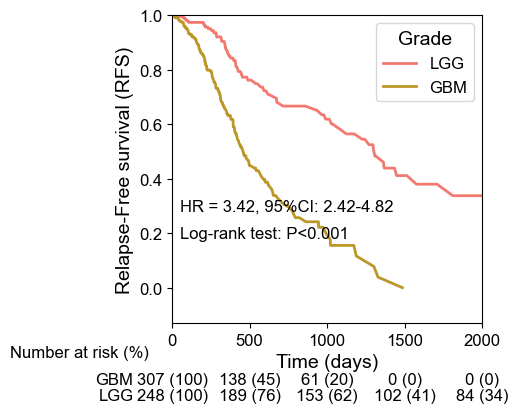

/tmp/ipykernel_3853565/1851715385.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_IDH["Group"]= pred_IDH.IDH.apply(lambda x: "Mutation" if x == 0 else "Wild")


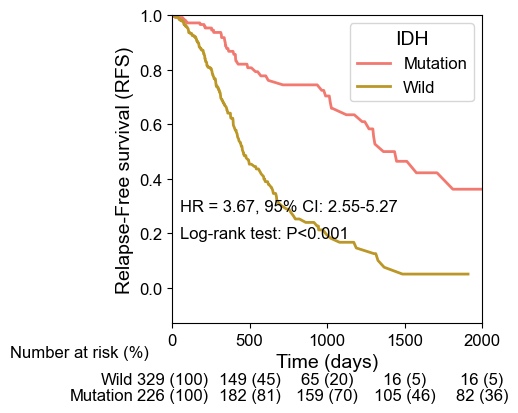

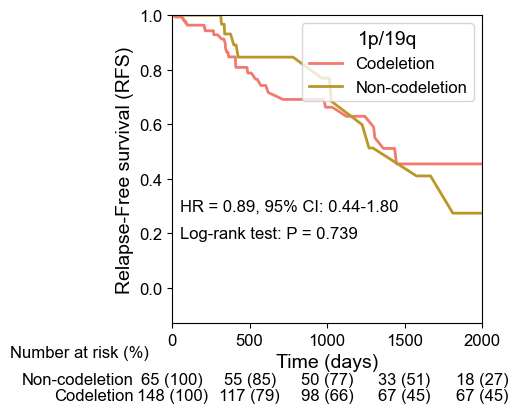

In [4]:
def plot_KM(df, title, y, HR=None):
    fig, axes = plt.subplots(figsize=(4, 4), nrows=1, ncols=1) 
    lw = 2  
    palette = ["#F27970", '#BB9727', '#54B345', '#32B897',
               "#05B9E2", "#8983BF", "#C76DA2", "#5F97D2", "#9DC3E7"]
    
    plt.rcParams['font.family'] = ['Arial']
    plt.rcParams["axes.labelsize"] = 18

    groups = df["Group"]
    label = ["1.LGG\nIDH-mt-codel", "2.LGG\nIDH-mt", "3.LGG\nIDH-wt",
             "4.GBM\nIDH-mt", "5.GBM\nIDH-wt"]
    labels = df["Group"].unique()
    kmf_list = []
    for i in range(len(labels)):
        ix = (groups == labels[i])
        kmf = KaplanMeierFitter()
        kmf.fit(df['Time'][ix], df['Event'][ix], label=labels[i])
        kmf_list.append(kmf)

        a = kmf.survival_function_
        a["timeline"] = a.index
        # print(a)
        axes.plot(a["timeline"], a[labels[i]], color=palette[i],
                  lw=lw, label=labels[i]) 

    # log-rank test 用最后一个 ix
    result = logrank_test(df['Time'][ix], df['Time'][~ix],
                          df['Event'][ix], df['Event'][~ix])

    # 设置坐标轴
    axes.set_ylim(bottom=-0.3, top=1.0)
    axes.set_xlim([0, 2000])
    axes.set_xlabel('Time (days)', fontsize=14)
    axes.set_ylabel('Relapse-Free survival (RFS)', fontsize=14)
    axes.tick_params(axis='both', labelsize=12)

    # 图例与文本
    axes.legend(loc="upper right", fontsize=12, title=title,title_fontsize=14)
    x = 0.3
    if HR:
        plt.text(y, x, HR, fontsize=12, verticalalignment='center',
                 horizontalalignment='left', color="k")
    if result.p_value < 0.001:
        plt.text(y, x - 0.1, "Log-rank test: P<0.001", fontsize=12,
                 verticalalignment='center', horizontalalignment='left', color="k")
    else:
        plt.text(y, x - 0.1, "Log-rank test: P = {:.3f}".format(result.p_value),
                 fontsize=12, verticalalignment='center', horizontalalignment='left', color="k")

    # -------- 添加自定义 Risk Table ----------
    timepoints = [0, 500, 1000, 1500, 2000]
    y_start = -0.08  # risk table 起始位置
    y_step = -0.06   # 每组之间的垂直距离

    axes.text(-150, -0.21, "Number at risk (%)", ha='right', va='top', fontsize=12)


    # 逐组添加 risk table 数字
    for i, kmf in enumerate(kmf_list):
        total = kmf.event_table.at_risk.iloc[0]
        for j, t in enumerate(timepoints):
            surv_prob = kmf.predict(t).values[0]
            num_alive = int(np.round(surv_prob * total))
            percent_alive = int(np.round(surv_prob * 100))
            text = f"{num_alive} ({percent_alive})"
            axes.text(t, y_start + y_step * (len(labels) - i +2.8), text,
                    ha='center', va='top', fontsize=12)

        # 添加组标签
        
        axes.text(-250, y_start + y_step * (len(labels) - i + 2.8), labels[i], 
                ha='right', va='top', fontsize=12)

    # 调整主图以显示底部风险表
    axes.set_ylim(bottom=y_start - 0.05)

    # plt.tight_layout()
    plt.show()
pred_grade = pred[["Time","Event","grade"]]
pred_grade.columns = ["Time","Event","Group"]
pred_grade["Group"]= pred_grade.Group.apply(lambda x: "LGG" if x == "1_b" else "GBM")
plot_KM(pred_grade,"Grade",50,HR = "HR = 3.42, 95%CI: 2.42-4.82")
# plot_KM_custom_risktable(pred_grade, title="Grade", y=200, HR="HR = 3.42, 95%CI: 2.42-4.82")

pred_IDH = pred[["Time","Event","IDH"]]
pred_IDH["Group"]= pred_IDH.IDH.apply(lambda x: "Mutation" if x == 0 else "Wild")
plot_KM(pred_IDH,"IDH",50,HR = "HR = 3.67, 95% CI: 2.55-5.27")

pred_p119q = pred[["Time","Event","p1_19qs"]]
pred_p119q = pred_p119q[pred_p119q["p1_19qs"] != 2]

pred_p119q["Group"]= pred_p119q.p1_19qs.apply(lambda x: "Codeletion" if x == 0 else "Non-codeletion")
plot_KM(pred_p119q,"1p/19q",50,HR = "HR = 0.89, 95% CI: 0.44-1.80")

/tmp/ipykernel_3853565/305438501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_grade["Group"]= pred_grade.logits_grade_cat.apply(lambda x: "Low" if x == "High" else "High")


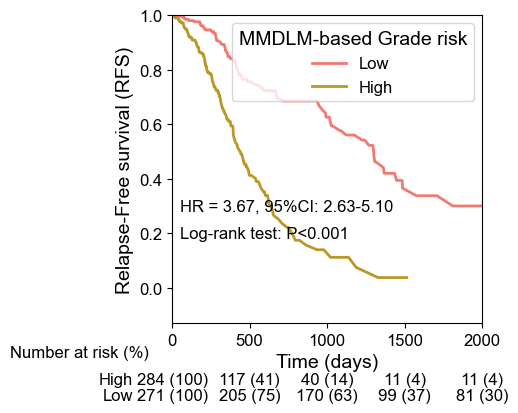

/tmp/ipykernel_3853565/305438501.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_IDH["Group"]= pred_IDH.logits_idh_cat.apply(lambda x: "High" if x == "2_High" else "Low")


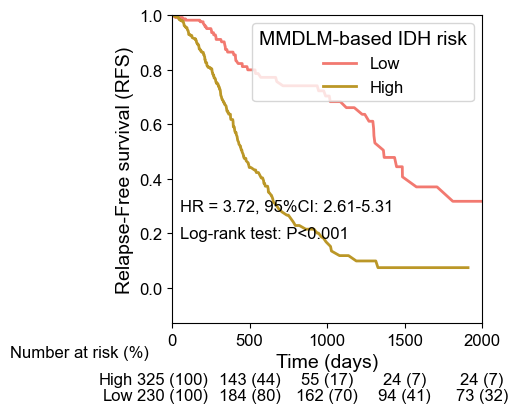

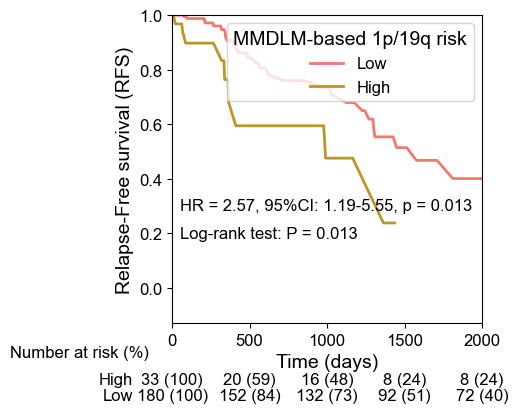

In [5]:
pred_grade = pred[["Time","Event","logits_grade_cat"]]
pred_grade["Group"]= pred_grade.logits_grade_cat.apply(lambda x: "Low" if x == "High" else "High")
plot_KM(pred_grade,"MMDLM-based Grade risk",50,HR = "HR = 3.67, 95%CI: 2.63-5.10")

pred_IDH = pred[["Time","Event","logits_idh_cat"]]
pred_IDH["Group"]= pred_IDH.logits_idh_cat.apply(lambda x: "High" if x == "2_High" else "Low")
plot_KM(pred_IDH,"MMDLM-based IDH risk",50,HR = "HR = 3.72, 95%CI: 2.61-5.31")

pred_p119q = pred[["Time","Event","logits_p119q_cat"]]
pred_p119q = pred_p119q[pred_p119q["logits_p119q_cat"].notna()]

pred_p119q["Group"]= pred_p119q.logits_p119q_cat.apply(lambda x: "Low" if x == "2_High" else "High")
plot_KM(pred_p119q,"MMDLM-based 1p/19q risk",50,HR = "HR = 2.57, 95%CI: 1.19-5.55, p = 0.013")

In [6]:
cox = pd.read_csv("table1.csv")
cox["lower95_1"] = cox["exp"]- cox["lower95"]
cox["upper95_1"] = cox["upper95"] -cox["exp"]
cox["group"] = ["2.LGG\nIDH-mt","3.LGG\nIDH-wt","4.GBM\nIDH-mt","5.GBM\nIDH-wt"]

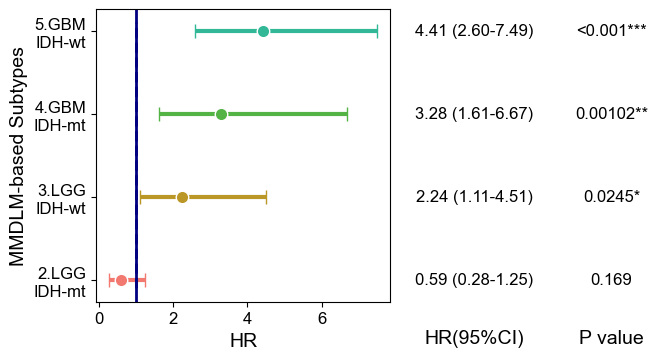

In [7]:
def plot_cox(df, axia, axia2, gap,ylabel ):
    plt.rcParams['font.family'] = ['Arial']
    plt.rcParams["axes.labelsize"] = 18
    # 调色板
    palette = ["#F27970", '#BB9727', '#54B345', '#32B897', "#05B9E2", "#8983BF", "#C76DA2", "#5F97D2", "#9DC3E7"]
    lw = 2
    fig, axes = plt.subplots(figsize=(3.8, 3.8), nrows=1, ncols=1)
    
    # 动态颜色分配，根据分组数目循环取颜色
    colors = [palette[i % len(palette)] for i in range(len(df))]
    
    for i in range(len(df)):
        # 为每一组设置不同的颜色
        axes.errorbar(y=[i], x=[df.exp[i]], 
                      xerr=[[df["lower95_1"][i]], [df["upper95_1"][i]]],
                      fmt='o', capsize=5, markersize=9, 
                      mfc=colors[i], mec="white", ecolor=colors[i],
                      elinewidth=3)
    
    # 添加基准线
    plt.plot([1, 1], [-0.1, len(df) - 0.9], color='navy', lw=2, linestyle='--')
    plt.axvline(x=1, color='navy', lw=2, linestyle='-')
    
    # 设置坐标轴刻度
    plt.yticks(range(len(df)), df.group)
    if ylabel == "MMDLM-based Subtypes":
        plt.xlabel('HR', fontsize=14)
    else:
        plt.xlabel('HR', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    axes.tick_params(axis='both', labelsize=12)
    
    # 添加文本信息
    for i in range(len(df)):
        plt.text(axia + gap, i, df.p1[i], fontsize=12, verticalalignment='center', horizontalalignment='center', color="k")
        plt.text(axia, i, df.HR[i], fontsize=12, verticalalignment='center', horizontalalignment='center', color="k")
    # if ylabel == "MMDLM-based Subtypes":
    plt.text(axia + gap, axia2, "P value", fontsize=14, verticalalignment='center', horizontalalignment='center', color="k")
    plt.text(axia, axia2, "HR(95%CI)", fontsize=14, verticalalignment='center', horizontalalignment='center', color="k")
    
        
    plt.show()
    return None
cox = pd.read_csv("table1.csv")
cox["lower95_1"] = cox["exp"]- cox["lower95"]
cox["upper95_1"] = cox["upper95"] -cox["exp"]
cox["group"] = ["2.LGG\nIDH-mt","3.LGG\nIDH-wt","4.GBM\nIDH-mt","5.GBM\nIDH-wt"]
plot_cox(cox,axia= 10.1,axia2=-0.7,gap = 3.7,ylabel= "MMDLM-based Subtypes")

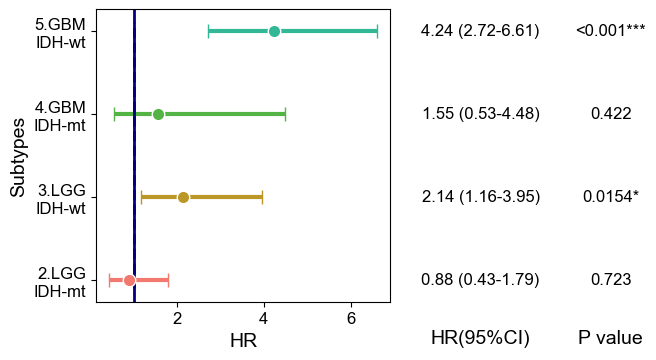

In [9]:
cox = pd.read_csv("table2.csv")
cox["lower95_1"] = cox["exp"]- cox["lower95"]
cox["upper95_1"] = cox["upper95"] -cox["exp"]
cox["group"] = ["2.LGG\nIDH-mt","3.LGG\nIDH-wt","4.GBM\nIDH-mt","5.GBM\nIDH-wt"]
plot_cox(cox,axia= 9,axia2=-0.7,gap =3,ylabel= "Subtypes")